Tema 6. Martingalas y recorridos aleatorios. 

# Martingalas y recorridos aleatorios
## Esperanza condicionada
Sea $(\Omega,\mathcal F,\mathbb P)$ un espacio de probabilidad y sea $B\in\mathcal F$ con $\mathbb P(B)>0$. La probabilidad condicionada se define por:
$$\mathbb P(A\mid B)=\frac{\mathbb P(A\cap B)}{\mathbb P(B)},\quad A\in\mathcal F.$$
La esperanza condicionada de una v.a. $X$ dado el suceso $B$ es:
$$\mathbb E[X\mid B]=\int X(\omega)\,d\mathbb P(\omega\mid B)=\frac{1}{\mathbb P(B)}\int_B X(\omega)\,d\mathbb P(\omega)=\frac{\mathbb E[X\mathbf 1_B]}{\mathbb P(B)}.$$

Propiedades útiles (para $\mathbb P(B)>0$):
- Linealidad: $\mathbb E[X+Y\mid B]=\mathbb E[X\mid B]+\mathbb E[Y\mid B]$
- Homogeneidad: $\mathbb E[aX\mid B]=a\,\mathbb E[X\mid B]$
- Monotonía: si $X\le Y$ c.s., entonces $\mathbb E[X\mid B]\le \mathbb E[Y\mid B]$
- Partición: si $B=\bigcup_{i=1}^n A_i$ con $A_i$ disjuntos, entonces $\mathbb E[X\mid B]=\sum_{i=1}^n \mathbb E[X\mid A_i]\,\mathbb P(A_i\mid B)$

## Filtraciones y martingalas
Una filtración es una familia creciente de $\sigma$-álgebras $(\mathcal F_t)_{t\ge 0}$ con $\mathcal F_s\subseteq \mathcal F_t$ si $s\le t$.
Un proceso $(X_t)_{t\ge 0}$ es **adaptado** si $X_t$ es $\mathcal F_t$-medible para todo $t$.
Un proceso adaptado $(X_t)$ es una **martingala** respecto a $(\mathcal F_t)$ si:
1. $\mathbb E[|X_t|]<\infty$ (integrabilidad)
2. $X_t$ es $\mathcal F_t$-medible (adaptación)
3. $\mathbb E[X_t\mid \mathcal F_s]=X_s$ c.s. para $s\le t$

Además:
- **Supermartingala**: $\mathbb E[X_t\mid \mathcal F_s]\le X_s$ (tendencia a disminuir en media)
- **Submartingala**: $\mathbb E[X_t\mid \mathcal F_s]\ge X_s$ (tendencia a aumentar en media)

## Ejemplo (recorrido aleatorio simétrico)
Sea $Z_1,Z_2,\dots$ i.i.d. con $\mathbb P(Z_i=1)=\mathbb P(Z_i=-1)=1/2$ y $X_n=\sum_{i=1}^n Z_i$. Sea $\mathcal F_n=\sigma(Z_1,\dots,Z_n)$.
Entonces
$$M_n = X_n^2 - n$$
es una martingala respecto a $(\mathcal F_n)$. En la siguiente celda se verifica la condición $\mathbb E[M_{n+1}\mid \mathcal F_n]=M_n$ (equivalentemente, se toma esperanza solo sobre $Z_{n+1}$).


In [5]:
# Importar librerías necesarias para cálculos matemáticos / simbólicos
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
from sympy.stats import FiniteRV, E

# Ejemplo: recorrido aleatorio simétrico
# X_n = sum_{i=1}^n Z_i, con P(Z_i=1)=P(Z_i=-1)=1/2.
# M_n = X_n^2 - n es una martingala. Para verificarlo basta ver que:
#   E[M_{n+1} | F_n] = M_n
# donde la esperanza se toma solo respecto a Z_{n+1} (X_n se trata como constante dado F_n).

n = symbols('n', integer=True, positive=True)
X_n = symbols('X_n')

# Definimos Z ~ {-1, +1} con probabilidad 1/2 cada uno
Z = FiniteRV('Z', {-1: sp.Rational(1, 2), 1: sp.Rational(1, 2)})

M_n = X_n**2 - n
M_n1 = (X_n + Z)**2 - (n + 1)  # M_{n+1} = X_{n+1}^2 - (n+1), con X_{n+1}=X_n+Z

E_M_n1_given_F_n = sp.simplify(E(M_n1))

print('E[M_{n+1} | F_n] =', E_M_n1_given_F_n)
print('M_n             =', M_n)
print('¿Coinciden?      =', sp.simplify(E_M_n1_given_F_n - M_n) == 0)

E[M_{n+1} | F_n] = X_n**2 - n
M_n             = X_n**2 - n
¿Coinciden?      = True


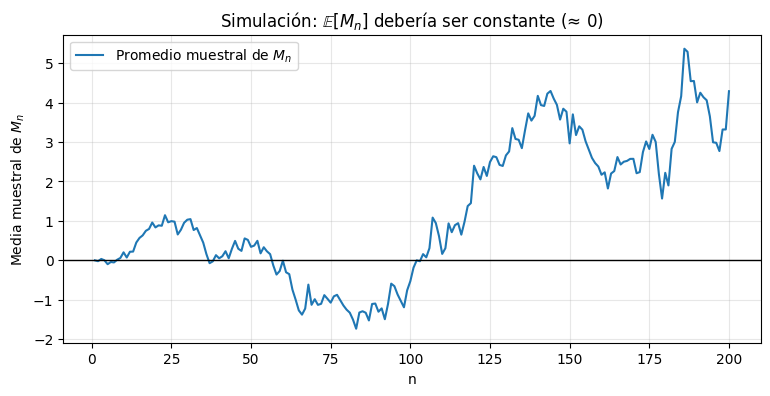

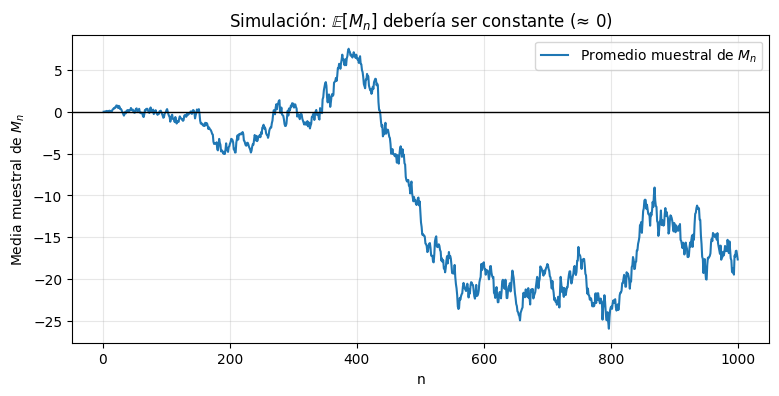

In [6]:
# Verificación numérica: simulación del recorrido aleatorio y M_n = X_n^2 - n
rng = np.random.default_rng(123)

n_steps = 200
n_paths = 5000

# Z_i in {-1, +1}
Z = rng.choice([-1, 1], size=(n_paths, n_steps))
X = np.cumsum(Z, axis=1)

# t = 1..n_steps (porque X es desde n=1)
t = np.arange(1, n_steps + 1)
M = X**2 - t

mean_M = M.mean(axis=0)

plt.figure(figsize=(9, 4))
plt.plot(t, mean_M, label='Promedio muestral de $M_n$')
plt.axhline(0, color='black', linewidth=1)
plt.title('Simulación: $\mathbb{E}[M_n]$ debería ser constante (≈ 0)')
plt.xlabel('n')
plt.ylabel('Media muestral de $M_n$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


#Hazlo para mas pasos
n_steps = 1000
n_paths = 5000  
# Z_i in {-1, +1}
Z = rng.choice([-1, 1], size=(n_paths, n_steps))
X = np.cumsum(Z, axis=1)
# t = 1..n_steps (porque X es desde n=1)
t = np.arange(1, n_steps + 1)
M = X**2 - t
mean_M = M.mean(axis=0)
plt.figure(figsize=(9, 4))
plt.plot(t, mean_M, label='Promedio muestral de $M_n$')
plt.axhline(0, color='black', linewidth=1)
plt.title('Simulación: $\mathbb{E}[M_n]$ debería ser constante (≈ 0)')
plt.xlabel('n')
plt.ylabel('Media muestral de $M_n$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()      



In [16]:
#Usando sympy quiero hacer calculo de matrices con incognitas. mis matrices a multiplicar son: 
#H = Matrix([[1, 4, 1], [1, -6, -3], [1, 9, 9]]) 
#D = Matrix([[1, 0, 0], [0, e^{-5t}, 0], [0, 0, e^{-8t}]])
#H_inv = H.inv()
from sympy import Matrix, exp, symbols
t = symbols('t')
H = Matrix([[1, 4, 1], [1, -6, -3], [1, 9, 9]])
D = Matrix([[1, 0, 0], [0, exp(-5*t), 0], [0, 0, exp(-8*t)]])
H_inv = H.inv()
result = H * D * H_inv
sp.pprint(result)
#simplifica la mtriz resultante sacando 1/60 de la matriz y multiplicando cada elemento por 60
result_simplified = result * 60
sp.pprint(result_simplified)

#llevalo al limite cuando t tiende a infinito 
limit_result = result.limit(t, sp.oo)
sp.pprint(limit_result)



⎡         -5⋅t    -8⋅t            -5⋅t    -8⋅t            -5⋅t    -8⋅t ⎤
⎢ 9    4⋅ℯ       ℯ        9    8⋅ℯ       ℯ        1    4⋅ℯ       ℯ     ⎥
⎢ ── + ─────── - ─────    ── - ─────── + ─────    ── - ─────── + ───── ⎥
⎢ 20      5        4      20     15       12      10     15        6   ⎥
⎢                                                                      ⎥
⎢        -5⋅t      -8⋅t           -5⋅t    -8⋅t            -5⋅t    -8⋅t ⎥
⎢9    6⋅ℯ       3⋅ℯ       9    4⋅ℯ       ℯ        1    2⋅ℯ       ℯ     ⎥
⎢── - ─────── + ───────   ── + ─────── - ─────    ── + ─────── - ───── ⎥
⎢20      5         4      20      5        4      10      5        2   ⎥
⎢                                                                      ⎥
⎢        -5⋅t      -8⋅t          -5⋅t      -8⋅t          -5⋅t      -8⋅t⎥
⎢9    9⋅ℯ       9⋅ℯ      9    6⋅ℯ       3⋅ℯ      1    3⋅ℯ       3⋅ℯ    ⎥
⎢── + ─────── - ───────  ── - ─────── + ───────  ── - ─────── + ───────⎥
⎣20      5         4     20      5         4     10

In [24]:
#Ahora tengo una matriz de saltos integrada 
P =  Matrix([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
#Es periodica de periodo 3. 
#calcula su p^2 y p^3
P2 = P**2
P3 = P**3
sp.pprint(P2)
sp.pprint(P3)
#Si mi vector inicial es v0 = Matrix([[1], [0], [0]])
v0 = Matrix([[1], [0], [0]])
#Quiero que me resuelvas la distribucion estacionaria de esta matriz P. Sabiendo que es periodica ypartiendo de V_0. 
#Por medio de un sistemde ecuaciones con \pi
pi1, pi2, pi3 = symbols('pi1 pi2 pi3')
P_1 = Matrix([[pi1, pi2, pi3]])
#Multiplicaras V_0 *P
Pi_1 = P_1 * P
sp.pprint(Pi_1)
Pi_2 = P_1 * P2
sp.pprint(Pi_2)
Pi_3 = P_1 * P3
sp.pprint(Pi_3)



⎡0  0  1⎤
⎢       ⎥
⎢1  0  0⎥
⎢       ⎥
⎣0  1  0⎦
⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦
[π₃  π₁  π₂]
[π₂  π₃  π₁]
[π₁  π₂  π₃]


Vamos con otro tema igual de interesante.

Procesos de nacimiento y muerte y procesos de poisson.

# Procesos de nacimiento y muerte y procesos de Poisson
## Procesos de nacimiento y muerte
Un proceso de nacimiento y muerte es un proceso de Markov continuo en el tiempo con espacio de estados $\mathbb N_0=\{0,1,2,\dots\}$, donde las transiciones solo pueden ocurrir entre estados adyacentes. Es decir, desde el estado $n$ solo se puede transitar a $n+1$ (nacimiento) o a $n-1$ (muerte).
Sea $(X_t)_{t\ge 0}$ un proceso de nacimiento y muerte con tasas de nacimiento $\lambda_n$ y tasas de muerte $\mu_n$. Entonces, las probabilidades de transición en un intervalo pequeño $h$ son:
- $\mathbb P(X_{t+h}=n+1\mid X_t=n) = \lambda_n h + o(h)$
- $\mathbb P(X_{t+h}=n-1\mid X_t=n) = \mu_n h + o(h)$
- $\mathbb P(X_{t+h}=n\mid X_t=n) = 1 - (\lambda_n + \mu_n) h + o(h)$
- $\mathbb P(X_{t+h}=m\mid X_t=n) = o(h)$ para $|m-n|>1$      




## Proceso de Poisson
Un proceso de Poisson es un caso especial de proceso de nacimiento y muerte donde las tasas de nacimiento son constantes $\lambda_n=\lambda$ y las tasas de muerte son cero $\mu_n=0$. Es decir, el proceso solo puede aumentar.
Sea $(N_t)_{t\ge 0}$ un proceso de Poisson con tasa $\lambda>0$. Entonces, las probabilidades de transición en un intervalo pequeño $h$ son:
- $\mathbb P(N_{t+h}=n+1\mid N_t=n) = \lambda h + o(h)$
- $\mathbb P(N_{t+h}=n\mid N_t=n) = 1 - \lambda h + o(h)$
- $\mathbb P(N_{t+h}=m\mid N_t=n) = o(h)$ para $m\ne n,n+1$         
La distribución de $N_t$ es:

$$\mathbb P(N_t=n) = e^{-\lambda t} \frac{(\lambda t)^n}{n!},\quad n=0,1,2,\dots$$

Además, los tiempos entre eventos (nacimientos) son i.i.d. con distribución exponencial de parámetro $\lambda$. 
## Propiedades del proceso de Poisson
- Incrementos independientes: para $0\le t_1 < t_2 < \cdots < t_n$, los incrementos $N_{t_2}-N_{t_1}, N_{t_3}-N_{t_2}, \dots, N_{t_n}-N_{t_{n-1}}$ son independientes.
- Incrementos estacionarios:       la distribución de $N_{t+s}-N_t$ depende solo de $s$ y no de $t$.
- Esperanza y varianza: $\mathbb E[N_t] = \lambda t$ y $\mathrm{Var}(N_t) = \lambda t$.
- Superposición: la suma de dos procesos de Poisson independientes con tasas $\lambda_1$ y $\lambda_2$ es un proceso de Poisson con tasa $\lambda_1 + \lambda_2$.
- División: si cada evento de un proceso de Poisson con tasa $\lambda$ se clasifica en dos tipos con probabilidades $p$ y $1-p$, entonces los procesos resultantes son procesos de Poisson independientes con tasas $\lambda p$ y $\lambda (1-p)$.  

